In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlalchemy

from database_credentials import get_database_url
from datetime import datetime, timedelta

In [2]:
plt.style.use('ggplot')
sns.set_style('white')

In [3]:
database_url = get_database_url()
engine = sqlalchemy.create_engine(database_url)
connection = engine.connect()

In [4]:
buy_data = pd.read_sql_table('buy_data', connection)
sell_data = pd.read_sql_table('sell_data', connection)

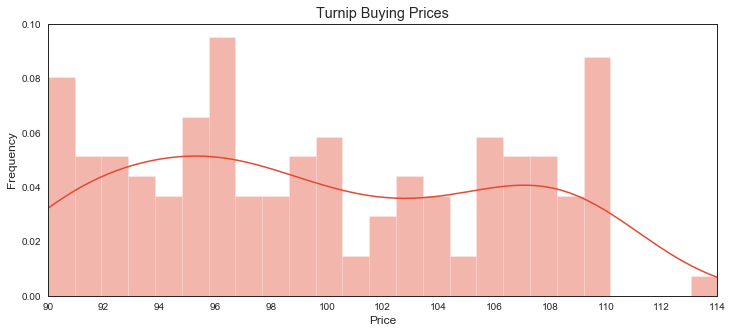

Buying Prices Description:
count    142.000000
mean      99.718310
std        6.612224
min       90.000000
25%       94.250000
50%       99.000000
75%      106.000000
98%      110.000000
max      114.000000
Name: price, dtype: float64



In [6]:
buy_prices = buy_data['price']
buy_percentiles = [0.25, 0.50, 0.75, 0.98]
buy_price_describe = buy_prices.describe(percentiles=buy_percentiles)

buy_min = buy_price_describe['min']
buy_max = buy_price_describe['max']

buy_bins = int(buy_max - buy_min + 1)
buy_plot_xticks = np.arange(buy_min, buy_max + 1, 2)

plt.figure(figsize=(12, 5))
buy_plot = sns.distplot(buy_prices, bins=buy_bins)
buy_plot.set(
    title='Turnip Buying Prices',
    xlabel='Price',
    ylabel='Frequency'
)
plt.xlim(buy_min, buy_max)
plt.xticks(buy_plot_xticks)
plt.show()

print("Buying Prices Description:\n{0}\n".format(buy_price_describe))

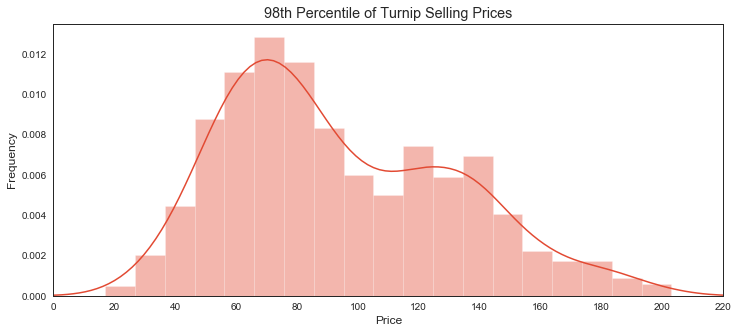

Selling Prices:
count    1079.000000
mean      100.400371
std        60.777134
min        17.000000
25%        65.000000
50%        86.000000
75%       125.000000
98%       203.880000
max       589.000000
Name: price, dtype: float64



In [7]:
sell_prices = sell_data['price']
sell_percentiles = [0.25, 0.50, 0.75, 0.98]
sell_price_describe = sell_prices.describe(percentiles=sell_percentiles)

sell_min = sell_price_describe['min']
sell_98_percentile = sell_price_describe['98%']

# mask sparse price data above 98th percentile 
sell_prices_98_percentile = sell_prices[sell_prices <= sell_98_percentile]

sell_bins = int(round((sell_98_percentile - sell_min) / 10, 0))

sell_tick_step = round(sell_bins, -1)
sell_tick_max = math.ceil(sell_98_percentile) + sell_tick_step
sell_plot_xticks = np.arange(0, sell_tick_max, sell_tick_step)
plt.figure(figsize=(12, 5))
sell_plot = sns.distplot(sell_prices_98_percentile, bins=19)
sell_plot.set(
    title='98th Percentile of Turnip Selling Prices',
    xlabel='Price',
    ylabel='Frequency'
)
plt.xlim(0, round(sell_98_percentile, -1))
plt.xticks(sell_plot_xticks)
plt.show()

print("Selling Prices:\n{0}\n".format(sell_price_describe))

In [8]:
sell_data_pivot = pd.pivot_table(
    sell_data, 
    values='price', 
    index=['user_id', 'island_id'], 
    columns=['datetime_observed']
)
display(sell_data_pivot.head(3))

,datetime_observed,2020-04-13 00:00:00,2020-04-13 12:00:00,2020-04-14 00:00:00,2020-04-14 12:00:00,2020-04-15 00:00:00,2020-04-15 12:00:00,2020-04-16 00:00:00,2020-04-16 12:00:00,2020-04-17 00:00:00,2020-04-17 12:00:00,...,2020-04-21 00:00:00,2020-04-21 12:00:00,2020-04-22 00:00:00,2020-04-22 12:00:00,2020-04-23 00:00:00,2020-04-23 12:00:00,2020-04-24 00:00:00,2020-04-24 12:00:00,2020-04-25 00:00:00,2020-04-25 12:00:00
user_id,island_id,,,,,,,,,,,,,,,,,,,,,
Aaron,Moonstone,68.0,81.0,77.0,132.0,107.0,143.0,148.0,145.0,55.0,51.0,...,99.0,93.0,NaN,NaN,63.0,56.0,50.0,109.0,122.0,NaN
Adam,Key Largo,69.0,61.0,89.0,104.0,NaN,NaN,NaN,54.0,47.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aika,Erijima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,156.0,170.0,150.0,73.0,69.0,64.0,60.0,55.0,52.0,47.0


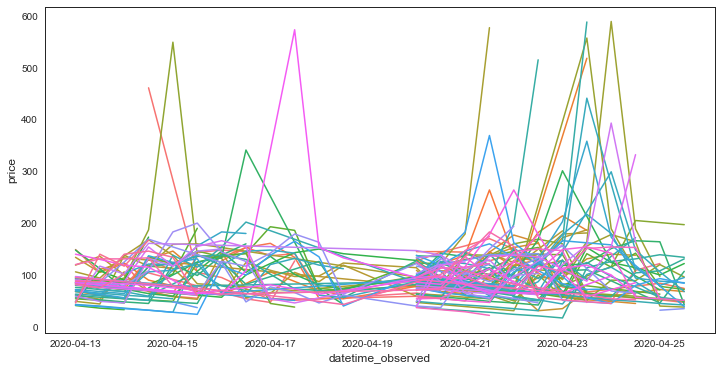

In [9]:
sell_data['user_island_id'] = list(zip(sell_data['user_id'], sell_data['island_id']))
plt.figure(figsize=(12, 6))
sns.lineplot(x='datetime_observed', y='price', data=sell_data, hue='user_island_id', legend=False)
plt.show()

In [ ]:
query = '''
    SELECT *
    FROM sell_data
    WHERE datetime_observed < '2020-04-19'
'''
week1_sell_data = pd.read_sql(query, connection)

query2 = '''
    SELECT *
    FROM sell_data
    WHERE datetime_observed > '2020-04-19'
'''
week2_sell_data = pd.read_sql(query2, connection)

In [ ]:
week1_sell_data

In [ ]:
connection.close()
engine.dispose()